In [1]:
import numpy as np
%matplotlib inline  
import matplotlib.pyplot as plt

# Chapter 3: Notes

## Section 3.3

### Example 3.2

We investigate the claim of Eq. (3.23) that on the unit interval $[0,1]$, 
$$
    \large 1 = \frac{4}{\pi} \sum_{k=1}^\infty \frac{1}{2k-1}\sin((2k-1)\pi x).
$$
Let $S_N(x)$ denote a partial sum where the first $N$ terms are taken. 
We make some plots below motivated by Figure 3.3 in the text. 

If we take the discretization of $[0,1]$ to be fine enough (say we use twice as many points as the largest $N$ considered), then we see that Figure 3.3 is a bit misleading (there is no pointwise convergence at the endpoints as this figure suggests).

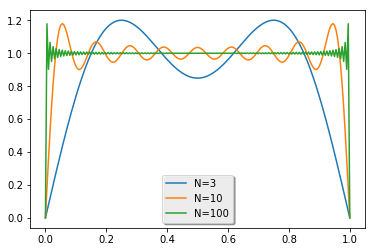

In [6]:
N = np.array([3, 10, 100])
x = np.linspace(0,1, 2*N.max())

for N_iter in N:
    S_N = 0*x
    for k in xrange(1,N_iter):
        S_N += 1./(2*k-1)*np.sin((2*k-1)*np.pi*x)
    S_N *= 4/np.pi
    plt.plot(x,S_N, label='N='+str(N_iter))

plt.legend(loc='bottom center', shadow=True)

It appears that the error in the $\sup$-norm is bounded below by about $0.2$ for just about every function in the partial sum! 
In other words, it seems like if we let $f(x)=1$ and $S_N(x)$ be defined as above, then 
$$
    \large \sup_{x\in[0,1]} | f(x) - S_N(x) | \geq 0.2
$$
seems to be true at least infinitely often. 
We recall from basic calculus/analysis that for a sequence of real numbers $\{a_n\}$ and real number $a$ that if there exists an $\epsilon>0$ such that no matter what $N$ is chosen there is always an $n>N$ such that $|a_n-a|\geq \epsilon$, then $\{a_n\}$ does **not** converge to $a$. 

What about a different notion of convergence?
Suppose that instead of defining the error in the partial sum approximation as $e_N = \sup_{x\in[0,1]} |f(x)-S_N(x)|$, we instead measure the mean square error, i.e., we define the square of the error in an ***average*** sense as
$$
    \large e_N := \int_0^1 |f(x)-S_N(x)|^2\, dx.
$$
If this $e_N\to 0$ as $N\to\infty$, then we say that the sequence of partial sums converges in mean square (or we say that $L^2$ if we have taken measure theory/functional analysis). 

#### Approximating the integrals

Since the integrand involved in computing $e_N$ looks annoying, we use Monte Carlo (MC) approximations, which are incredibly simple to implement.

MC approximations will generally vary from sample set to sample set, but the variance can be made sufficiently small if a sufficiently large number of samples are used.  

In [7]:
M = 1E6 # Number of MC sample points

x = np.random.random(M)

for N_iter in N:
    S_N = 0*x
    for k in xrange(1,N_iter):
        S_N += 1./(2*k-1)*np.sin((2*k-1)*np.pi*x)
    S_N *= 4/np.pi
    e_N = 1/M * np.sum((1-S_N)**2)
    print e_N

C:\Users\eecsu\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


0.0995240981939
0.0225959737245
0.00206991381256


We now look at studying Figure 3.4 that shows the solution (or at least a truncated version of (3.24)) at various times.
Note that within $t=1E-5$ that the oscillations are already removed.

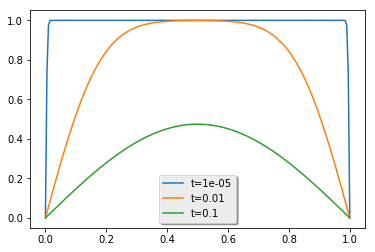

In [8]:
N = 100 # Specify the truncation
t = [0.00001, 0.01, 0.1] # Specify the times to plot the solution
x = np.linspace(0,1, 2*N)

for t_iter in t:
    u_N = 0*x
    for k in xrange(1,N):
        u_N += 1./(2*k-1)*np.sin((2*k-1)*np.pi*x) * \
                    np.exp(-((2*k-1)*np.pi)**2*t_iter)
    u_N *= 4/np.pi
    plt.plot(x,u_N, label='t='+str(t_iter))

plt.legend(loc='bottom center', shadow=True)

### Example 3.4

Students should try repeating the above numerical studies for this example and compare to Figure 3.5. 
Are there any places where the pointwise error does not seem to get better? 